<a href="https://colab.research.google.com/github/zanderVenter/GEE_misc/blob/master/multiclass_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install rioxarray if you are running this in Colab:

In [1]:
%pip install rioxarray -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 54.8 MB/s eta 0:00:00


Import relevant libraries for this starter script:

In [2]:
import os
import rioxarray as rxr
import rasterio as rio
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import numpy as np
from pathlib import Path

Fetch the satellite imagery and their masks fromt he GitHub repo:

In [3]:
!git clone https://github.com/NINAnor/test-multiclass-segmentation.git

Cloning into 'test-multiclass-segmentation'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 37 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (37/37), 55.06 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (4/4), done.


Reset root directory and list the image files

In [4]:
root = Path('test-multiclass-segmentation/dset-s2-grunnkart')
assert root.exists()

train_imgs = list((root/'tra_scene').glob('*.tif'))
train_masks = list((root/'tra_truth').glob('*.tif'))

val_imgs = list((root/'val_scene').glob('*.tif'))
val_masks = list((root/'val_truth').glob('*.tif'))

# As the images and corresponding masks are matched by name, we will sort both lists to keep them synchronized.
train_imgs.sort(); train_masks.sort(); val_imgs.sort(); val_masks.sort()

Open one image and one mask and plot:

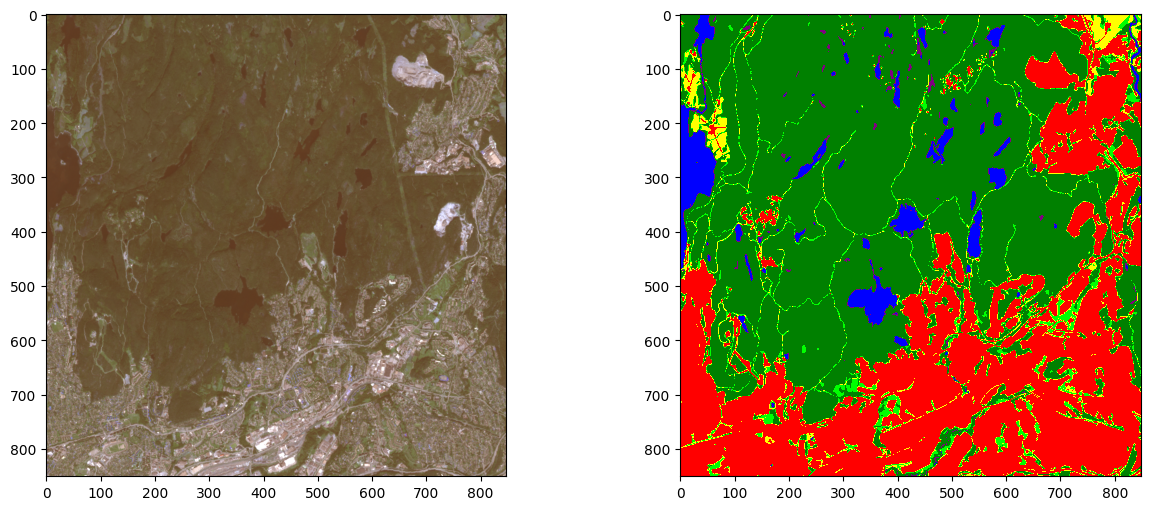

In [5]:
idx = 0
img = rxr.open_rasterio(train_imgs[idx])
mask = rxr.open_rasterio(train_masks[idx])

_, axs = plt.subplots(1, 2, figsize=(15, 6))

# plot the tile
rgb = img.data[[2, 1, 0]].transpose((1, 2, 0))/2000
axs[0].imshow(rgb.clip(min=0, max=1))

# plot the mask
axs[1].imshow(mask.data.squeeze(), cmap=ListedColormap(['red','yellow','lime','green','purple','blue']))

**Continue from here on however you like**

The task is described in the GitHub readme.